In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

# Data import and pre-processing 

In [2]:
df=pd.read_csv("train.csv")

In [3]:
X=np.array(df.iloc[:,1:785])
y=np.array(df.iloc[:,0])

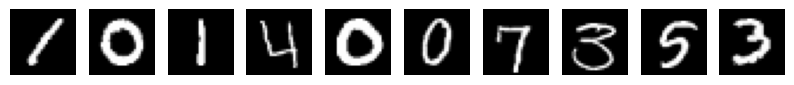

In [4]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape((33600, 28, 28, 1)).astype('float32') / 255
X_test=X_test.reshape((8400, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Using ANN

In [7]:
from tensorflow.keras import layers, models
model= models.Sequential()

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.compile(
              optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [9]:
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25


420/420 [==============================] - 2s 2ms/step - loss: 0.4227 - accuracy: 0.8795 - val_loss: 0.2045 - val_accuracy: 0.9414
Epoch 2/25
420/420 [==============================] - 1s 2ms/step - loss: 0.1538 - accuracy: 0.9544 - val_loss: 0.1608 - val_accuracy: 0.9522
Epoch 3/25
420/420 [==============================] - 1s 2ms/step - loss: 0.1052 - accuracy: 0.9685 - val_loss: 0.1438 - val_accuracy: 0.9558
Epoch 4/25
420/420 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.1483 - val_accuracy: 0.9558
Epoch 5/25
420/420 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.1242 - val_accuracy: 0.9655
Epoch 6/25
420/420 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.1240 - val_accuracy: 0.9650
Epoch 7/25
420/420 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.1319 - val_accuracy: 0.9634
Epoc

In [10]:
test_loss, test_acc=model.evaluate(X_test,y_test)

263/263 [==============================] - 0s 860us/step - loss: 0.2110 - accuracy: 0.9624


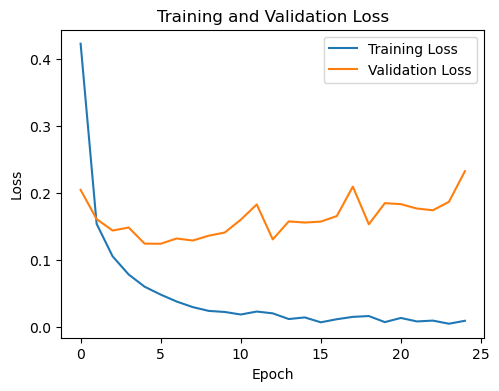

In [11]:
plt.figure(figsize=(12, 4))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Woking with Test Data

In [12]:
df_test=pd.read_csv('test.csv')

In [13]:
X_test_real=np.array(df_test)
X_test_real.shape

(28000, 784)

In [14]:
X_test_real=X_test_real.reshape((28000, 28, 28, 1)).astype('float32') / 255

In [22]:
predictions = model.predict(X_test_real)

# 'predictions' will contain the predicted outputs for each sample in X_test

# Optionally, convert the predicted outputs to class labels (if your output is categorical)
predicted_classes = tf.argmax(predictions, axis=1)

875/875 [==============================] - 1s 2ms/step


In [16]:
predicted_classes

<tf.Tensor: shape=(28000,), dtype=int64, numpy=array([2, 0, 9, ..., 3, 9, 2], dtype=int64)>

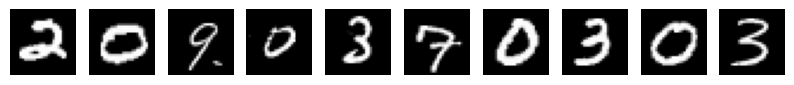

In [17]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_real[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [18]:
import pandas as pd

# Assuming 'predicted_classes' is the array containing predicted class labels
# Create a DataFrame with the predicted class labels
result_df = pd.DataFrame({'ImageId': range(1, len(predicted_classes) + 1), 'Label': predicted_classes})

# Save the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)


# Using CNN 

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train,y_train, epochs=60, batch_size=32, validation_split=0.25)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/60
788/788 [==============================] - 7s 8ms/step - loss: 1.1102 - accuracy: 0.6555 - val_loss: 0.3618 - val_accuracy: 0.8932
Epoch 2/60
788/788 [==============================] - 7s 9ms/step - loss: 0.2904 - accuracy: 0.9112 - val_loss: 0.2515 - val_accuracy: 0.9248
Epoch 3/60
788/788 [==============================] - 6s 8ms/step - loss: 0.1906 - accuracy: 0.9405 - val_loss: 0.1768 - val_accuracy: 0.9433
Epoch 4/60
788/788 [==============================] - 7s 9ms/step - loss: 0.1450 - accuracy: 0.9545 - val_loss: 0.1677 - val_accuracy: 0.9435
Epoch 5/60
788/788 [==============================] - 7s 8ms/step - loss: 0.1187 - accuracy: 0.9635 - val_loss: 0.1276 - val_accuracy: 0.9613
Epoch 6/60
788/788 [==============================] - 6s 8ms/step - loss: 0.0998 - accuracy: 0.9687 - val_loss: 0.1019 - val_accuracy: 0.9688
Epoch 7/60
788/788 [==============================] - 7s 9ms/step - loss: 0.0893 - accuracy: 0.9723 - val_loss: 0.0903 - val_accuracy: 0.9723
Epoch 

788/788 [==============================] - 6s 8ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0749 - val_accuracy: 0.9842
Epoch 59/60
788/788 [==============================] - 7s 8ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0751 - val_accuracy: 0.9849
Epoch 60/60
263/263 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9873
Test accuracy: 0.9872618913650513


In [34]:
predictions = model.predict(X_test_real)

# 'predictions' will contain the predicted outputs for each sample in X_test

# Optionally, convert the predicted outputs to class labels (if your output is categorical)
predicted_classes = tf.argmax(predictions, axis=1)

875/875 [==============================] - 2s 3ms/step


In [35]:
import pandas as pd

# Assuming 'predicted_classes' is the array containing predicted class labels
# Create a DataFrame with the predicted class labels
result_df = pd.DataFrame({'ImageId': range(1, len(predicted_classes) + 1), 'Label': predicted_classes})

# Save the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)